# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

--2021-11-07 20:34:38--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2021-11-07 20:34:38 (5.20 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,362,95,47,81,176,59,7,168,39,20,152,196,425,185,67,4,4,191,198
1,20,84,47,75,153,64,6,154,43,19,145,175,354,184,75,0,3,185,192
2,808,83,46,68,139,59,6,150,44,19,146,172,336,183,74,5,3,185,191
3,110,89,40,77,159,65,9,144,46,19,141,168,314,143,70,0,5,190,200
4,812,98,38,72,192,69,5,166,38,20,131,189,427,138,70,1,3,200,202
5,208,86,46,70,149,65,8,149,45,19,146,170,331,185,77,6,6,183,188
6,829,95,49,82,139,56,11,159,43,20,162,173,365,185,75,7,10,182,191
7,443,99,50,88,204,64,10,185,35,22,159,209,517,193,66,12,11,194,201
8,472,105,50,93,173,54,4,222,30,25,159,254,735,206,83,4,12,186,184
9,693,90,46,75,133,55,11,160,43,20,161,173,369,171,77,0,16,182,192


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,423.593807,93.715847,44.943534,82.010929,168.989071,61.821494,8.686703,168.593807,40.959927,20.555556,148.285974,188.479053,438.444444,175.599271,72.409836,6.533698,12.515483,189.065574,195.812386
std,242.152371,8.241748,6.005662,15.736188,33.014317,8.060957,4.935739,32.982588,7.664155,2.576407,14.095872,31.054843,176.019541,32.174020,7.548963,4.918798,8.943570,6.229439,7.418865
min,0.000000,73.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,220.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,168.000000,319.000000,151.000000,67.000000,3.000000,5.000000,184.000000,191.000000
50%,419.000000,93.000000,45.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,635.000000,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,216.000000,576.000000,197.000000,76.000000,10.000000,18.000000,193.000000,201.000000
max,843.000000,119.000000,58.000000,112.000000,322.000000,133.000000,55.000000,265.000000,59.000000,29.000000,182.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,41.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
np.random.seed(42)

Проверим на наличие пропусков

In [7]:
print(X_train_pd.isna().any().sum())
print(pd.DataFrame(target).isna().any().sum())

0
0


их нет

In [8]:
from collections import Counter

In [9]:
Counter(target)

Counter({'bus': 218, 'opel': 212, 'saab': 217, 'van': 199})

Классы сбалансированы

In [10]:
print(np.unique(y_train))

['bus' 'opel' 'saab' 'van']


Сопоставим каждому число от 0 до 3

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder = LabelEncoder()
label_encoder.fit(np.unique(y_train))

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

In [14]:
estimator = Pipeline([('scaler', StandardScaler()),
                     ('clf', LogisticRegression(multi_class='multinomial',
                                                solver='saga',
                                                tol=1e-3,
                                                max_iter=500))])

param_grid = {'clf__C' : np.linspace(0, 10, 100)}

lr = GridSearchCV(estimator, param_grid, n_jobs=-1)
lr = lr.fit(X_train, y_train).best_estimator_

In [15]:
print(f'f1 score: {f1_score(y_test, lr.predict(X_test), average="macro")}')
print(f'accuracy score: {accuracy_score(y_test, lr.predict(X_test))}')

f1 score: 0.7851509917449198
accuracy score: 0.7777777777777778


In [16]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

In [17]:
from scikitplot.metrics import plot_roc

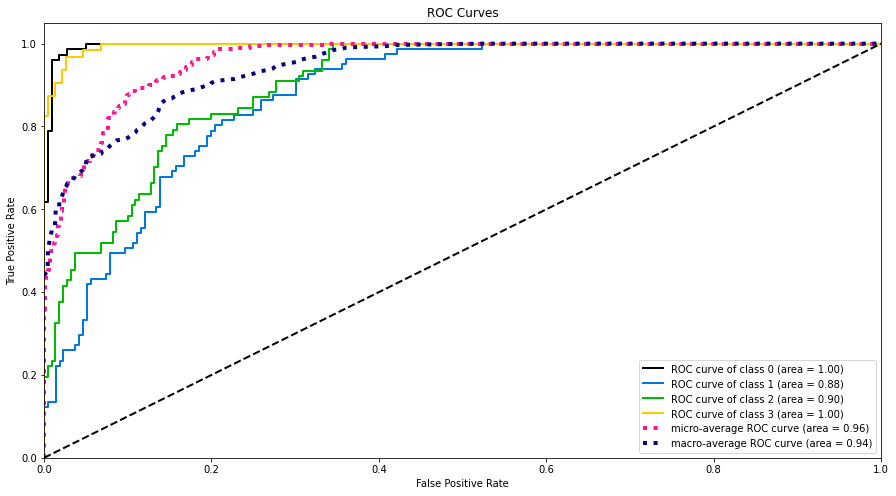

In [18]:
plot_roc(y_test, lr.predict_proba(X_test), figsize=(15, 8))

Видно что логистическая регрессия работает лучше для классов 0(bus) и 3(van)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [20]:
pca = PCA()
pipe_pca = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
pipe_pca.fit(X_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

No handles with labels found to put in legend.


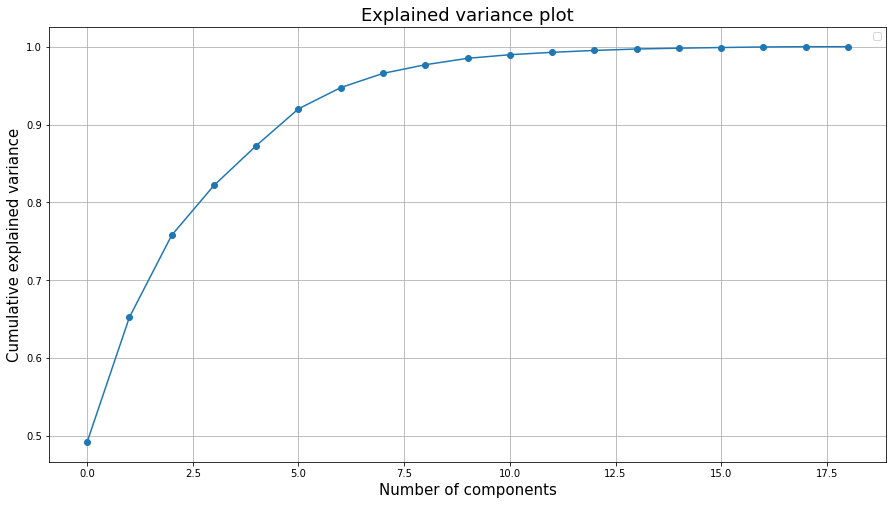

In [21]:
plt.figure(figsize=(15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o')
plt.title('Explained variance plot', fontsize=18)
plt.xlabel('Number of components', fontsize=15)
plt.ylabel('Cumulative explained variance', fontsize=15)
plt.legend()
plt.grid()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Кажется 12 компонент достаточно, так как они описывают уже больше 99%, и при увеличении количества компонент, они почти не добавят информацию. Нормализация данных необходима, иначе функции с большим разбросом будут вносить больший вклад в дисперсию

In [22]:
np.cumsum(pca.explained_variance_ratio_)[11]

0.9927705141586044

In [23]:
n_components = 12

pca = PCA(n_components=n_components)
pipe_pca = Pipeline([('scaler', StandardScaler()), ('pca', pca)])

X_train_pca = pipe_pca.fit_transform(X_train)
X_test_pca = pipe_pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [24]:
estimator = Pipeline([('scale_pca', StandardScaler()), 
                      ('pca', PCA(n_components=n_components)),
                      ('scale_clf', StandardScaler()),
                      ('clf', LogisticRegression(multi_class='multinomial',
                                                solver='saga',
                                                tol=1e-3,
                                                max_iter=500))])

param_grid = {'clf__C' : np.linspace(0, 10, 100)}

lr = GridSearchCV(estimator, param_grid, n_jobs=-1)
lr = lr.fit(X_train, y_train)
lr_params = lr.best_params_
lr = lr.best_estimator_

In [25]:
print(f'f1 score: {f1_score(y_test, lr.predict(X_test), average="macro")}')
print(f'accuracy score: {accuracy_score(y_test, lr.predict(X_test))}')

f1 score: 0.7193294595496381
accuracy score: 0.7104377104377104


In [26]:
print(f'best params: {lr_params}')

best params: {'clf__C': 0.7070707070707071}


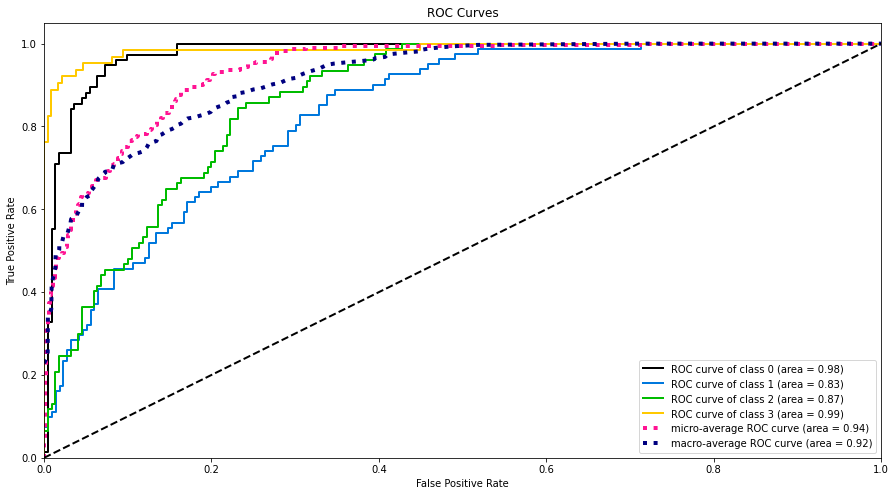

In [27]:
plot_roc(y_test, lr.predict_proba(X_test), figsize=(15, 8))

Видим, что при использовании PCA метрики упали(что ожидаемо, т.к. мы потеряли некоторую часть информации), но не сильно (так как это часть мала)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [28]:
from sklearn.tree import DecisionTreeClassifier

estimator = Pipeline([('scale_pca', StandardScaler()), 
                      ('pca', PCA(n_components=n_components)), 
                      ('clf', DecisionTreeClassifier())])

param_grid = {'clf__max_depth' : np.arange(1, 100)}

tree = GridSearchCV(estimator, param_grid, n_jobs=-1)
tree = tree.fit(X_train, y_train)
tree_params = tree.best_params_
tree = tree.best_estimator_

In [29]:
print(f'best params: {tree_params}')

best params: {'clf__max_depth': 11}


In [30]:
print(f'f1 score: {f1_score(y_test, tree.predict(X_test), average="macro")}')
print(f'accuracy score: {accuracy_score(y_test, tree.predict(X_test))}')

f1 score: 0.6305476500587802
accuracy score: 0.6195286195286195


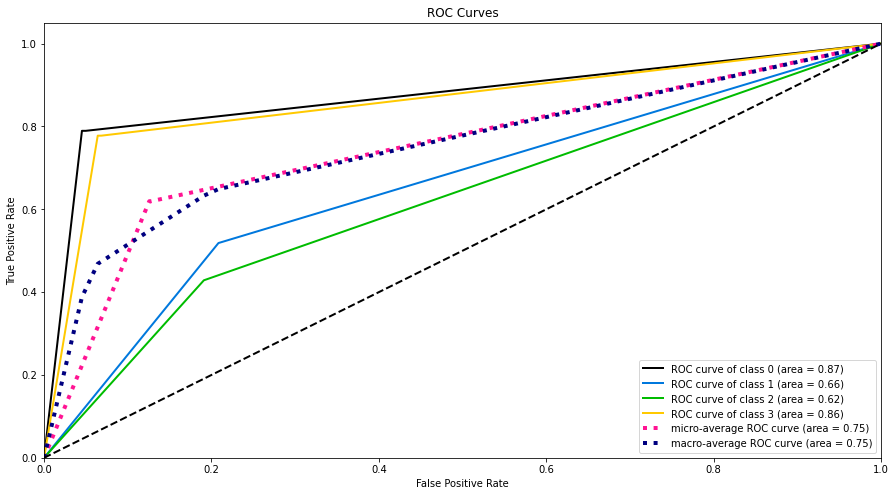

In [31]:
plot_roc(y_test, tree.predict_proba(X_test), figsize=(15, 8))

Видно, что результаты стали еще хуже.
Это довольно ожидаемо, ведь дерево только одно.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [32]:
from sklearn.ensemble import BaggingClassifier

In [33]:
N = np.arange(2, 100, 5)

In [34]:
def get_metric(func):
  f1s = []
  accuracies = []
  for n in N:
    clf = BaggingClassifier(base_estimator = func, 
                            n_estimators = n)
    clf.fit(X_train, y_train)
    f1s.append(f1_score(y_test, clf.predict(X_test), average = 'macro'))
    accuracies.append(accuracy_score(y_test, clf.predict(X_test)))
  return f1s, accuracies

In [35]:
def plot_metric(N, name, f1s, accuracies):
  plt.figure(figsize=(15, 8))
  plt.plot(N, f1s, label='f1 score')
  plt.plot(N, accuracies, label='accuracy score')
  plt.title(name, fontsize=18)
  plt.xlabel('Number of estimators', fontsize=15)
  plt.ylabel('Metric score', fontsize=15)
  plt.legend(fontsize=15)
  plt.grid()
  plt.show()
  

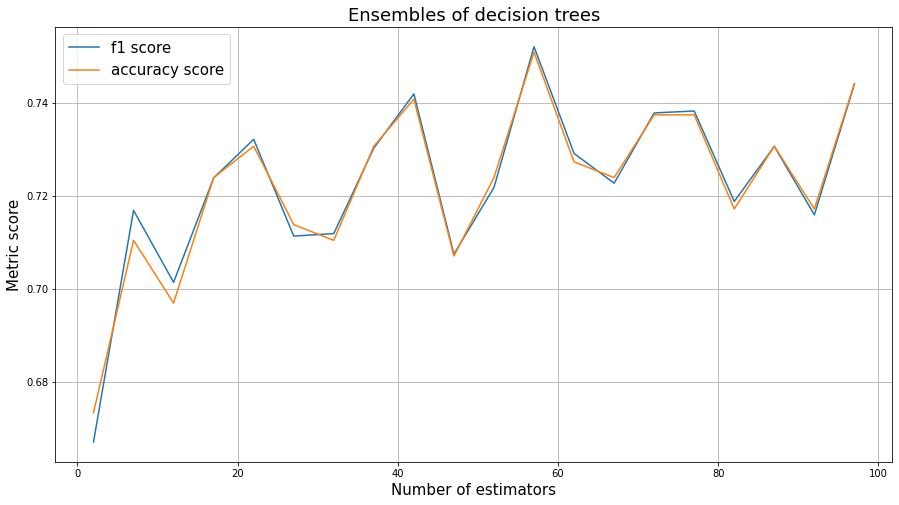

In [36]:
f1s, accuracies = get_metric(DecisionTreeClassifier(max_depth = tree_params['clf__max_depth']))

plot_metric(N, 'Ensembles of decision trees', f1s, accuracies)

Оптимальная оценка:

In [37]:
best_dt = N[np.argmax(accuracies)]
print(best_dt)

57


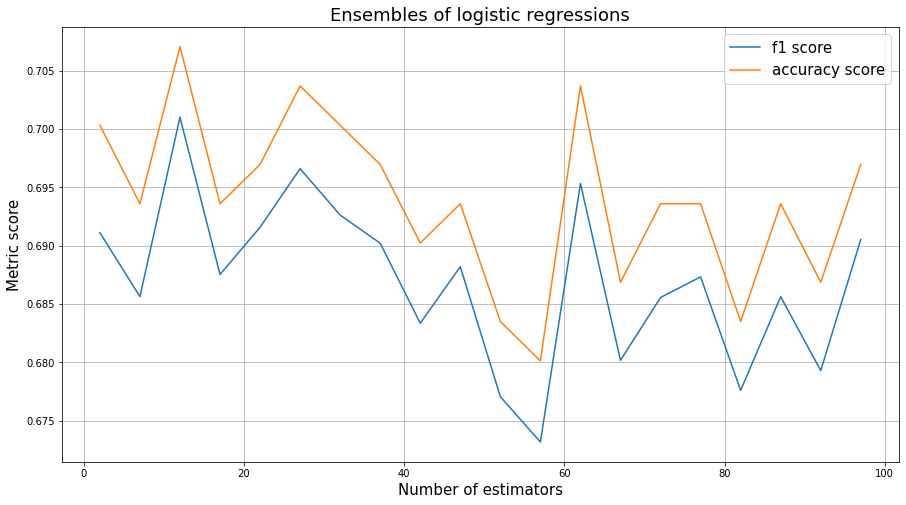

In [38]:
f1s, accuracies = get_metric(LogisticRegression(multi_class='multinomial',
                                            solver='saga',
                                            tol=1e-3,
                                            max_iter=1000, 
                                            C = lr_params['clf__C']))

plot_metric(N, 'Ensembles of logistic regressions', f1s, accuracies)

Оптимальная оценка:

In [39]:
best_lr = N[np.argmax(accuracies)]
print(best_lr)

12


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [40]:
from sklearn.ensemble import RandomForestClassifier

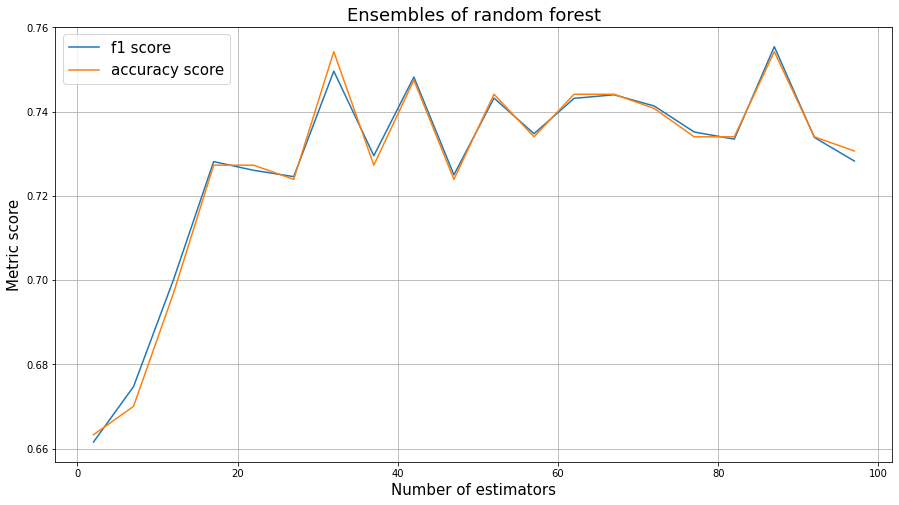

In [41]:
f1s = []
accuracies = []
for n in N:
  clf = RandomForestClassifier(n)
  clf.fit(X_train, y_train)
  f1s.append(f1_score(y_test, clf.predict(X_test), average = 'macro'))
  accuracies.append(accuracy_score(y_test, clf.predict(X_test)))

plot_metric(N, 'Ensembles of random forest', f1s, accuracies)

Оптимальная оценка:

In [42]:
best_rf = N[np.argmax(accuracies)]
print(best_rf)

32


Можно сказать что для random forest достаточно около 22 моделей

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [43]:
from sklearn.model_selection import StratifiedKFold

In [44]:
skf = StratifiedKFold(n_splits=10, shuffle=True)
skf_iter = skf.split(X_train, y_train)

In [45]:
X_train_part = []
y_train_part = []
f1s = [[],[],[]]
accuracies = [[],[],[]]
size = []
models = [LogisticRegression(multi_class='multinomial',
                                            solver='saga',
                                            tol=1e-3,
                                            max_iter=1000, 
                                            C = lr_params['clf__C']),
         DecisionTreeClassifier(max_depth = tree_params['clf__max_depth']), 
         RandomForestClassifier(n_estimators=best_rf)]
names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

for _, index in skf_iter:
  if len(X_train_part) == 0:
    X_train_part = X_train[index]
    y_train_part = y_train[index]
  else:
    X_train_part = np.vstack((X_train_part, X_train[index]))
    y_train_part = np.hstack((y_train_part, y_train[index]))

  for i in range(len(models)):
    models[i] = models[i].fit(X_train_part, y_train_part)
    f1s[i].append(f1_score(y_test, models[i].predict(X_test), average='macro'))
    accuracies[i].append(accuracy_score(y_test, models[i].predict(X_test)))

  size.append(X_train_part.shape[0])


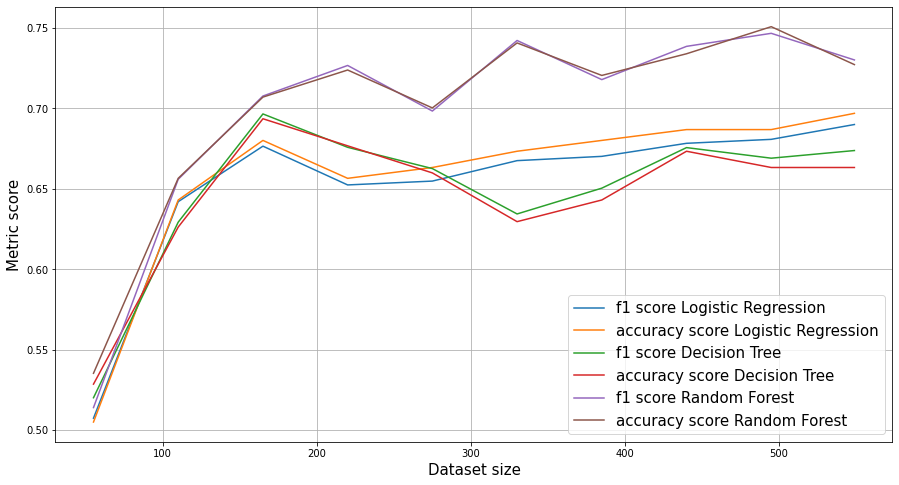

In [46]:
plt.figure(figsize=(15, 8))
for i in range(len(models)):
  plt.plot(size, f1s[i], label='f1 score '+names[i])
  plt.plot(size, accuracies[i], label='accuracy score '+names[i])
plt.xlabel('Dataset size', fontsize=15)
plt.ylabel('Metric score', fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()
  

1. Логично, что с увеличением размера выборки метрики становятся лучше(особенно это заметно для Random Forest), но иногда может произойти так, что на меньшем датасете получится лучше метрика(что мы видим у Decision Tree)
2. Можно увидеть, что Random Forest работает лучше остальных классификаторов, что в случае Decision Tree ожидаемо.